To do so, we will use [Plotly](https://plotly.com/python/)'s amazing Python graphing library. As no function enables us to directly plot a ridgeline, we will make extensive use of plotly.graph_objects library that enables us to add traces to a figure.

In [18]:
# getting necessary libraries
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# getting the data
temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv') # we retrieve the data from plotly's GitHub repository
temp['year'] = pd.to_datetime(temp['Date']).dt.year # we store the year in a separate column

# Since we do not want to plot 50+ lines, we only select some years to plot
year_list = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
temp = temp[temp['year'].isin(year_list)]

# as we expect to plot histograms-like plots for each year, we group by year and mean temperature and aggregate with 'count' function
temp = temp.groupby(['year', 'Mean_TemperatureC']).agg({'Mean_TemperatureC': 'count'}).rename(columns={'Mean_TemperatureC': 'count'}).reset_index()

In [19]:
# you can have a look at what the data looks like at this point
temp

,year,Mean_TemperatureC,count
0,1950,-12.0,1
1,1950,-11.0,1
2,1950,-10.0,2
3,1950,-9.0,6
4,1950,-8.0,4
...,...,...,...
199,2010,22.0,4
200,2010,23.0,3
201,2010,24.0,2
202,2010,26.0,2


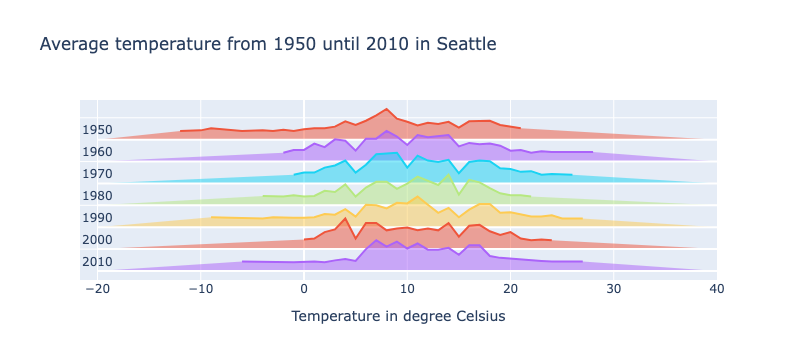

In [20]:
# the idea behind this ridgeline plot with Plotly is to add traces manually, each trace corresponding to a particular year's temperature distribution
# thus, we are to store each year's data (temperatures and their respective count) in seperate arrays or pd.series that we store in a dictionnary to retrieve them easily
array_dict = {} # instantiating an empty dictionnary
for year in year_list:
    array_dict[f'x_{year}'] = temp[temp['year']==year]['Mean_TemperatureC'] # storing the temperature data for each year
    array_dict[f'y_{year}'] = temp[temp['year']==year]['count'] # storing the temperature count for each year
    array_dict[f'y_{year}'] = (array_dict[f'y_{year}'] - array_dict[f'y_{year}'].min()) \
                                / (array_dict[f'y_{year}'].max() - array_dict[f'y_{year}'].min()) # we normalize the array (min max normalization)

# once all of this is done, we can create a plotly.graph_objects.Figure and add traces with fig.add_trace() method
# since we have stored the temperatures and their respective count for each year, we can plot scatterplots (go.Scatter)
# we thus iterate over year_list and create a 'blank line' that is placed at y = index, then the corresponding temperature count line
fig = go.Figure()
for index, year in enumerate(year_list):
    fig.add_trace(go.Scatter(
                            x=[-20, 40], y=np.full(2, len(year_list)-index),
                            mode='lines',
                            line_color='white'))
    
    fig.add_trace(go.Scatter(
                            x=array_dict[f'x_{year}'],
                            y=array_dict[f'y_{year}'] + (len(year_list)-index) + 0.4,
                            fill='tonexty',
                            name=f'{year}'))
    
    # plotly.graph_objects' way of adding text to a figure
    fig.add_annotation(
                        x=-20,
                        y=len(year_list)-index,
                        text=f'{year}',
                        showarrow=False,
                        yshift=10)

# here you can modify the figure and the legend titles
fig.update_layout(
                title='Average temperature from 1950 until 2010 in Seattle',
                showlegend=False,
                xaxis=dict(title='Temperature in degree Celsius'),
                yaxis=dict(showticklabels=False) # that way you hide the y axis ticks labels
                )

fig.show()

Note that you can save this chart to a standalone file thanks to the `write.html()` function. It is then possible to render it in any html document using an `<iframe>`

In [21]:
# If you need to save this file as a standalong html file:
fig.write_html("../../static/interactiveCharts/ridgeline-graph-plotly.html")

In [22]:
%%html
<iframe src="../../interactiveCharts/ridgeline-graph-plotly.html" width="800" height="600" title="ridgeline chart with plotly" style="border:none"></iframe>